### Importação das bases de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import locale
from locale import currency

In [ ]:
with open('despesa_ceaps_2008.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])


ISO-8859-1


In [ ]:
df1 = pd.read_csv('despesa_ceaps_2008.csv', encoding='ISO-8859-1', sep=';')
df2 = pd.read_csv('despesa_ceaps_2009.csv', encoding='ISO-8859-1', sep=';')
df3 = pd.read_csv('despesa_ceaps_2010.csv', encoding='ISO-8859-1', sep=';')
df4 = pd.read_csv('despesa_ceaps_2011.csv', encoding='ISO-8859-1', sep=';')
df5 = pd.read_csv('despesa_ceaps_2012.csv', encoding='ISO-8859-1', sep=';')
df6 = pd.read_csv('despesa_ceaps_2013.csv', encoding='ISO-8859-1', sep=';')
df7 = pd.read_csv('despesa_ceaps_2014.csv', encoding='ISO-8859-1', sep=';')
df8 = pd.read_csv('despesa_ceaps_2015.csv', encoding='ISO-8859-1', sep=';')
df9 = pd.read_csv('despesa_ceaps_2016.csv', encoding='ISO-8859-1', sep=';')
df10 = pd.read_csv('despesa_ceaps_2017.csv', encoding='ISO-8859-1', sep=';')
df11 = pd.read_csv('despesa_ceaps_2018.csv', encoding='ISO-8859-1', sep=';')
df12 = pd.read_csv('despesa_ceaps_2019.csv', encoding='ISO-8859-1', sep=';')
df13 = pd.read_csv('despesa_ceaps_2020.csv', encoding='ISO-8859-1', sep=';')
df14 = pd.read_csv('despesa_ceaps_2021.csv', encoding='ISO-8859-1', sep=';')
df15 = pd.read_csv('despesa_ceaps_2022.csv', encoding='ISO-8859-1', sep=';')
df16 = pd.read_csv('dataset_ceaps_forecasting.csv', encoding='ISO-8859-1')

In [ ]:
#fazendo todos os dataframes virarem um só
df_geral = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])

In [ ]:
df_geral

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR          TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR    DOCUMENTO DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO   
2008 9   ADA MELLO        Contratação de consultorias, assessorias, pesqu... NaN                NaN           NaN       NaN        NaN                                                          12351,52   
                          Locomoção, hospedagem, alimentação, combustívei... NaN                NaN           NaN       NaN        NaN                                                             386,6   
     10  ADA MELLO        Contratação de consultorias, assessorias, pesqu... NaN                NaN           NaN       NaN        NaN                                                          12351,52   
                          Locomoção, hospedagem, alimentação, combustívei... NaN                NaN           NaN       NaN        NaN                                                           2610,68   
...                                                                                                                                                                                                  ...   
2022 12  ZEQUINHA MARINHO Passagens aéreas, aquáticas e terrestres nacionais 22.052.777/0001-32 Exceller Tour WIXHAI    06/12/2022 Companhia Aérea: LATAM, Localizador: WIXHAI. Pa...            2893,04   
                                                                                                              WITOLM    09/12/2022 Companhia Aérea: GOL, Localizador: WITOLM. Pass...            1180,19   
                                                                                                              THPKVQ    20/12/2022 Companhia Aérea: TAM, Localizador: THPKVQ. Pass...             2671,9   
                                                                                                              QNN9HX    21/12/2022 Companhia Aérea: AZUL, Localizador: QNN9HX. Pas...            1334,31   
                                                                                                              WMQWBX    30/12/2022 Companhia Aérea: TAM, Localizador: WMQWBX. Pass...            2250,72   

                                                                                                                                                                                      06/08/2021 02:00  \
ANO  MES SENADOR          TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR    DOCUMENTO DATA       DETALHAMENTO                                          COD_DOCUMENTO   
2008 9   ADA MELLO        Contratação de consultorias, assessorias, pesqu... NaN                NaN           NaN       NaN        NaN                                                   2008090814004   
                          Locomoção, hospedagem, alimentação, combustívei... NaN                NaN           NaN       NaN        NaN                                                   2008090814003   
     10  ADA MELLO        Contratação de consultorias, assessorias, pesqu... NaN                NaN           NaN       NaN        NaN                                                   2008100814004   
                          Locomoção, hospedagem, alimentação, combustívei... NaN                NaN           NaN       NaN        NaN                                                   2008100814003   
...                                                                                                                                                                                                ...   
2022 12  ZEQUINHA MARINHO Passagens aéreas, aquáticas e terrestres nacionais 22.052.777/0001-32 Exceller Tour WIXHAI    06/12/2022 Companhia Aérea: LATAM, Localizador: WIXHAI. Pa...              NaN   
                                                                                                              WITOLM 

### Tratamento

In [ ]:
#resetando index
dfv1 = df_geral.reset_index()

#ajustando nomes das colunas
novos_nomes = ['ANO',	'MES',	'SENADOR',	'TIPO_DESPESA',	'CNPJ_CPF',	'FORNECEDOR',	'DOCUMENTO',	'DATA',	'DETALHAMENTO',	'VALOR_REEMBOLSADO',  'COD_DOCUMENTO',	'NaN',	'NaN',	'NaN',	'NaN',	'NaN',	'NaN',	'NaN']
dfv1.columns = novos_nomes

#apagando primeira linha
dfv1 = dfv1.drop(0)

#excluindo colunas desnecessárias, a partir da coluna n° 11
dfv2 = dfv1.drop(dfv1.columns[11:], axis=1)

#retirando as linhas que todos os valores são NaN
dfv3 = dfv2.dropna(how ='all')

#substituindo NaN's restantes por 0
dfv4 = dfv3.fillna(0)

#convertendo colunas necessarias em formato numerico
colunas_numericas = ['VALOR_REEMBOLSADO']
for coluna in colunas_numericas:
  dfv4[coluna] = pd.to_numeric(dfv4[coluna], errors='coerce')
dfv4 = dfv4.fillna(0)

#RESULTADO FINAL
dfv4.head(100)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",0,0,0,0,0,0.0,2008090814004
2,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",0,0,0,0,0,0.0,2008090814003
3,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",0,0,0,0,0,0.0,2008100814004
4,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",0,0,0,0,0,0.0,2008100814003
5,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",0,0,0,0,0,0.0,2008110814004
...,...,...,...,...,...,...,...,...,...,...,...
96,2008,9,ALOIZIO MERCADANTE,Aquisição de material de consumo para uso no e...,0,0,0,0,0,661.0,2008090349002
97,2008,9,ALOIZIO MERCADANTE,"Contratação de consultorias, assessorias, pesq...",0,0,0,0,0,89.0,2008090349004
98,2008,9,ALOIZIO MERCADANTE,"Locomoção, hospedagem, alimentação, combustíve...",0,0,0,0,0,0.0,2008090349003
99,2008,10,ALOIZIO MERCADANTE,"Aluguel de imóveis para escritório político, c...",0,0,0,0,0,0.0,2008100349001


###  Data Visualization

#### VALORES GASTOS POR DEPUTADO AO LONGO DOS ANOS

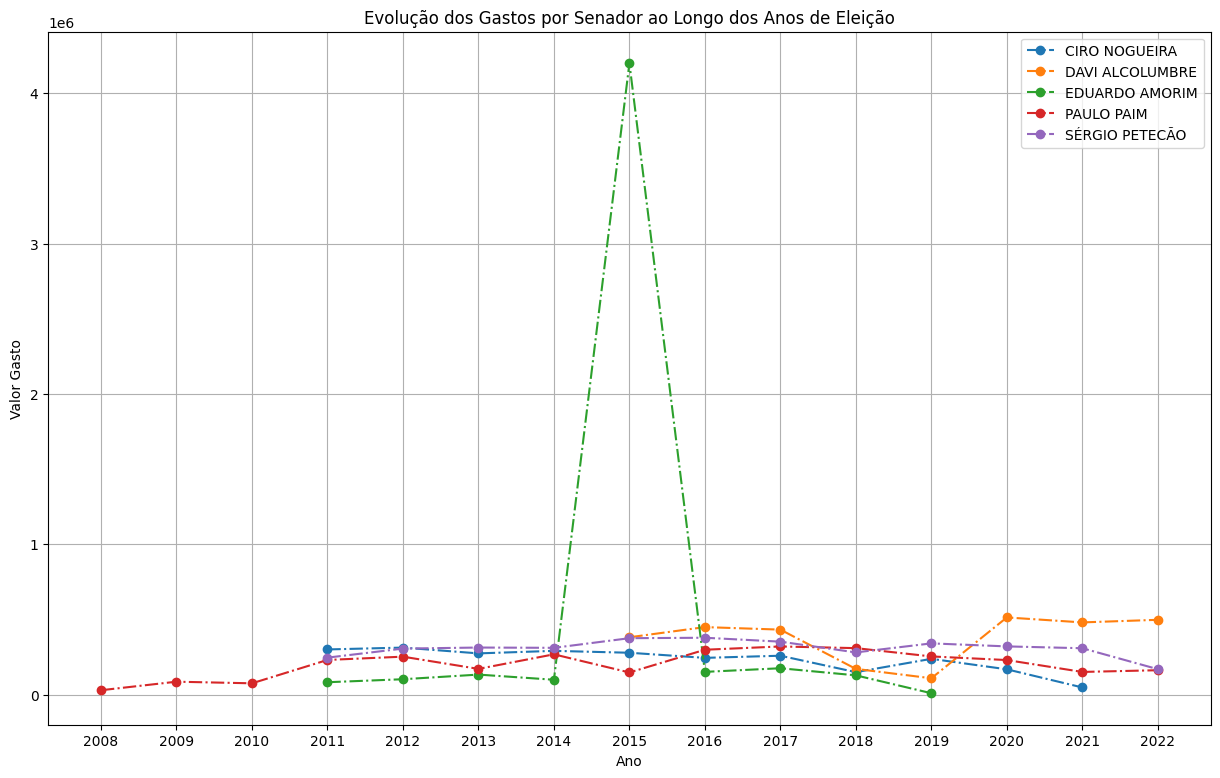

In [ ]:

anos_de_eleicao = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df_anos_eleição = dfv4[dfv4['ANO'].isin(anos_de_eleicao)]
df_anos_eleição1 = df_anos_eleição.groupby(['SENADOR', 'ANO'])['VALOR_REEMBOLSADO'].sum().to_frame().sort_values(by=['ANO','VALOR_REEMBOLSADO'], ascending=[True, False]).reset_index()
maiores_gastos = df_anos_eleição1.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).to_frame().head(7)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

senadores_selecionados = df_anos_eleição1.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(5).index
dados_plot = df_anos_eleição1[df_anos_eleição1['SENADOR'].isin(senadores_selecionados) & df_anos_eleição1['ANO'].isin(anos_de_eleicao)]
dados_agrupados = dados_plot.groupby(['SENADOR', 'ANO'])['VALOR_REEMBOLSADO'].sum().unstack()

fig, ax = plt.subplots(figsize=(15,9))
ax.grid()
for senador in dados_agrupados.index:
    ax.plot(anos_de_eleicao, dados_agrupados.loc[senador], marker='o', linestyle='dashdot', label=senador)
ax.grid(True)
ax.set_title('Evolução dos Gastos por Senador ao Longo dos Anos de Eleição')
ax.set_xlabel('Ano')
ax.set_ylabel('Valor Gasto')
ax.legend()

plt.show()
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#### GRÁFICOS INDIVIDUAIS

##### EDUARDO AMORIM'


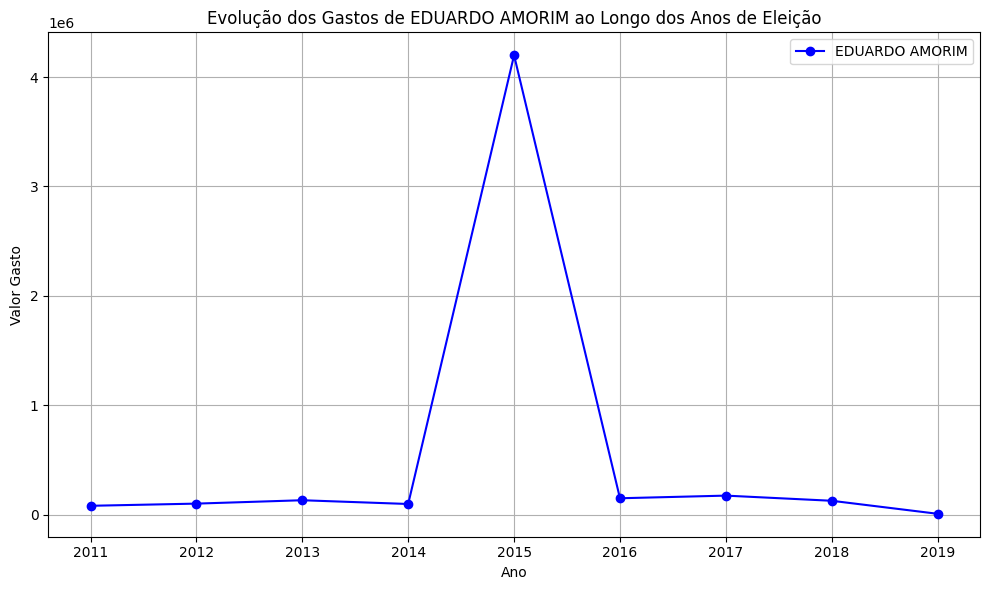

In [ ]:

nome_senador = 'EDUARDO AMORIM'
anos_de_eleicao = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dados_eduardo_amorim = df_anos_eleição1[(df_anos_eleição1['SENADOR'] == nome_senador) & (df_anos_eleição1['ANO'].isin(anos_de_eleicao))]


plt.figure(figsize=(10, 6))
plt.plot(dados_eduardo_amorim['ANO'], dados_eduardo_amorim['VALOR_REEMBOLSADO'], marker='o', linestyle='-', color='b', label=nome_senador)

plt.title(f'Evolução dos Gastos de {nome_senador} ao Longo dos Anos de Eleição')
plt.xlabel('Ano')
plt.ylabel('Valor Gasto')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dados_eduardo_amorim

,SENADOR,ANO,VALOR_REEMBOLSADO
322,EDUARDO AMORIM,2011,82818.0
427,EDUARDO AMORIM,2012,102714.0
505,EDUARDO AMORIM,2013,133572.0
600,EDUARDO AMORIM,2014,99291.0
638,EDUARDO AMORIM,2015,4198856.0
778,EDUARDO AMORIM,2016,151638.0
866,EDUARDO AMORIM,2017,175787.0
968,EDUARDO AMORIM,2018,128625.0
1104,EDUARDO AMORIM,2019,9700.0


In [ ]:
dados_eduardo_amorim['VALOR_REEMBOLSADO'].sum()

5083001.0

In [ ]:
dfv5 = dfv4.query("SENADOR == 'EDUARDO AMORIM' & ANO == '2015'")
dfv5 = dfv5[['SENADOR', 'ANO', 'MES', 'VALOR_REEMBOLSADO']]
dfv5['MES'] = pd.to_numeric(dfv5['MES'])
dfv6 = dfv5.groupby('MES')['VALOR_REEMBOLSADO'].sum().to_frame().sort_values(['MES'], ascending = True)
dfv6

,VALOR_REEMBOLSADO
MES,
1,11630.0
2,11890.0
3,12776.0
4,12180.0
5,13549.0
6,10895.0
7,16205.0
8,4046346.0
9,16040.0


##### 'CIRO NOGUEIRA'

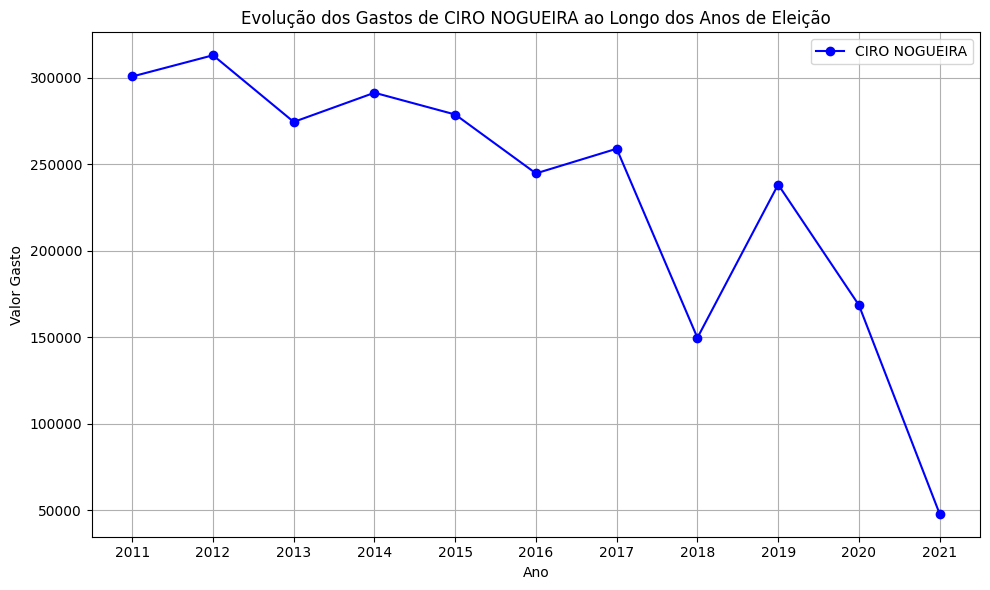

In [ ]:
nome_senador = 'CIRO NOGUEIRA'
anos_de_eleicao = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dados_ciro_nogueira = df_anos_eleição1[(df_anos_eleição1['SENADOR'] == nome_senador) & (df_anos_eleição1['ANO'].isin(anos_de_eleicao))]

plt.figure(figsize=(10, 6))
plt.plot(dados_ciro_nogueira['ANO'], dados_ciro_nogueira['VALOR_REEMBOLSADO'], marker='o', linestyle='-', color='b', label=nome_senador)

plt.title(f'Evolução dos Gastos de {nome_senador} ao Longo dos Anos de Eleição')
plt.xlabel('Ano')
plt.ylabel('Valor Gasto')
plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dados_ciro_nogueira

,SENADOR,ANO,VALOR_REEMBOLSADO
259,CIRO NOGUEIRA,2011,300811.0
377,CIRO NOGUEIRA,2012,313084.0
474,CIRO NOGUEIRA,2013,274557.0
555,CIRO NOGUEIRA,2014,291425.0
649,CIRO NOGUEIRA,2015,278835.0
752,CIRO NOGUEIRA,2016,244808.0
844,CIRO NOGUEIRA,2017,259069.0
958,CIRO NOGUEIRA,2018,149810.0
1031,CIRO NOGUEIRA,2019,238367.0
1176,CIRO NOGUEIRA,2020,168717.0


In [ ]:
dados_ciro_nogueira['VALOR_REEMBOLSADO'].sum()

2567575.0

##### 'DAVI ALCOLUMBRE'


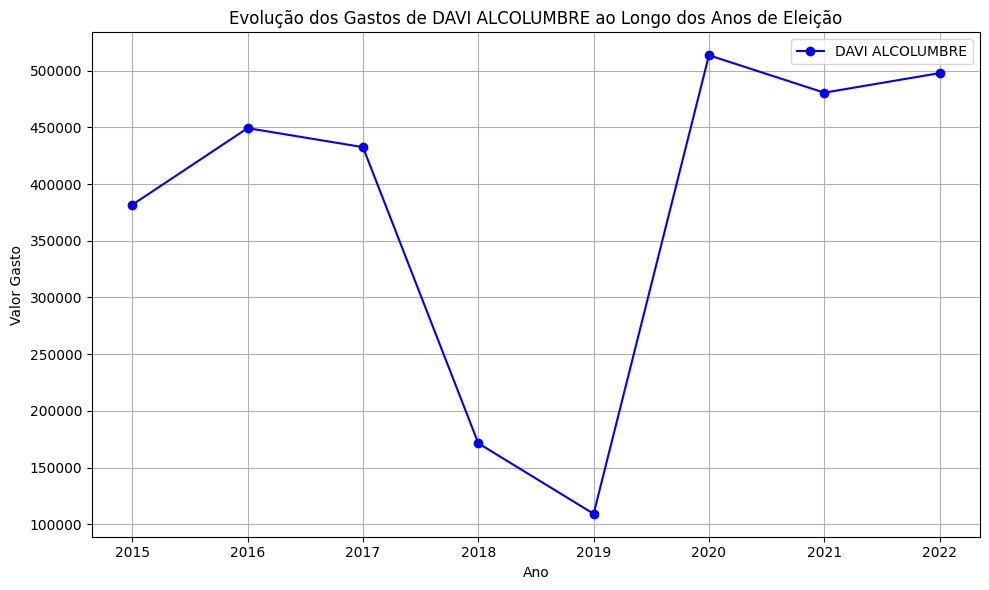

In [ ]:
nome_senador = 'DAVI ALCOLUMBRE'
anos_de_eleicao = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dados_davi_alcolumbre = df_anos_eleição1[(df_anos_eleição1['SENADOR'] == nome_senador) & (df_anos_eleição1['ANO'].isin(anos_de_eleicao))]


plt.figure(figsize=(10, 6))
plt.plot(dados_davi_alcolumbre['ANO'], dados_davi_alcolumbre['VALOR_REEMBOLSADO'], marker='o', linestyle='-', color='b', label=nome_senador)
plt.title(f'Evolução dos Gastos de {nome_senador} ao Longo dos Anos de Eleição')
plt.xlabel('Ano')
plt.ylabel('Valor Gasto')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dados_davi_alcolumbre

,SENADOR,ANO,VALOR_REEMBOLSADO
639,DAVI ALCOLUMBRE,2015,381738.0
739,DAVI ALCOLUMBRE,2016,449348.0
832,DAVI ALCOLUMBRE,2017,432587.0
954,DAVI ALCOLUMBRE,2018,171467.0
1064,DAVI ALCOLUMBRE,2019,109230.0
1138,DAVI ALCOLUMBRE,2020,513609.0
1222,DAVI ALCOLUMBRE,2021,480605.0
1308,DAVI ALCOLUMBRE,2022,497875.0


In [ ]:
dados_davi_alcolumbre['VALOR_REEMBOLSADO'].sum()

3036459.0

##### PAULO PAIM

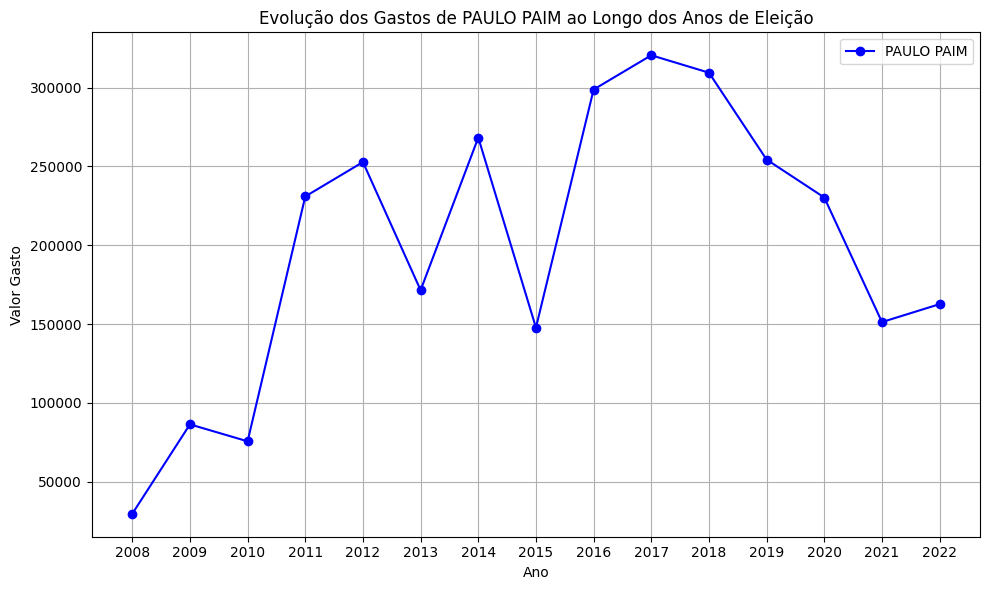

In [ ]:
nome_senador = 'PAULO PAIM'
anos_de_eleicao = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dados_paulo_paim = df_anos_eleição1[(df_anos_eleição1['SENADOR'] == nome_senador) & (df_anos_eleição1['ANO'].isin(anos_de_eleicao))]


plt.figure(figsize=(10, 6))
plt.plot(dados_paulo_paim['ANO'], dados_paulo_paim['VALOR_REEMBOLSADO'], marker='o', linestyle='-', color='b', label=nome_senador)
plt.title(f'Evolução dos Gastos de {nome_senador} ao Longo dos Anos de Eleição')
plt.xlabel('Ano')
plt.ylabel('Valor Gasto')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dados_paulo_paim

,SENADOR,ANO,VALOR_REEMBOLSADO
46,PAULO PAIM,2008,29578.0
122,PAULO PAIM,2009,86330.0
209,PAULO PAIM,2010,75583.0
266,PAULO PAIM,2011,230966.0
383,PAULO PAIM,2012,252799.0
492,PAULO PAIM,2013,171488.0
558,PAULO PAIM,2014,268338.0
681,PAULO PAIM,2015,147705.0
749,PAULO PAIM,2016,298835.0
836,PAULO PAIM,2017,320585.0


In [ ]:
dados_paulo_paim['VALOR_REEMBOLSADO'].sum()

2990282.0

##### SÉRGIO PETECÃO

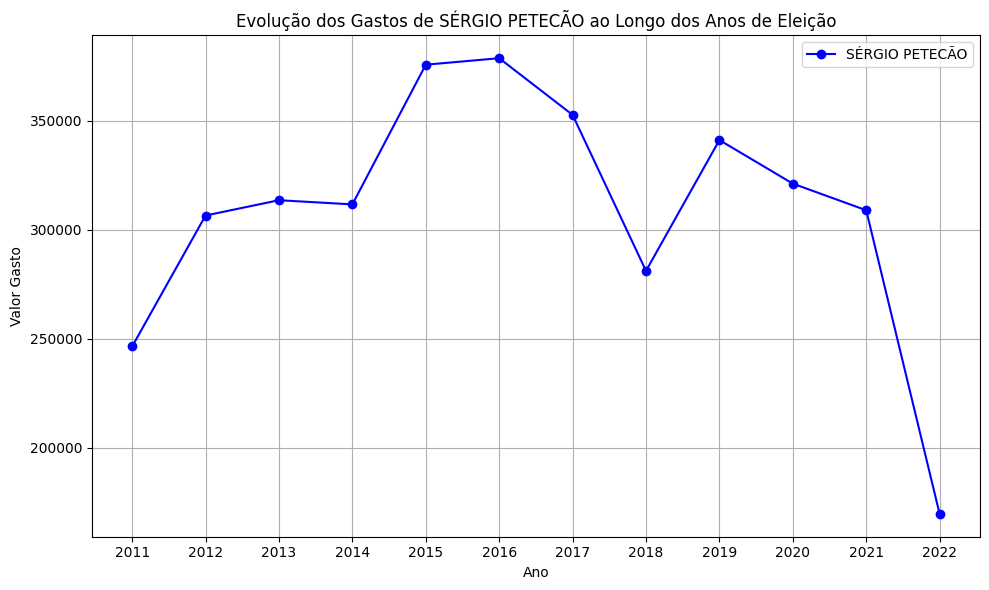

In [ ]:
nome_senador = 'SÉRGIO PETECÃO'
anos_de_eleicao = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dados_sergio_petecao = df_anos_eleição1[(df_anos_eleição1['SENADOR'] == nome_senador) & (df_anos_eleição1['ANO'].isin(anos_de_eleicao))]

plt.figure(figsize=(10, 6))
plt.plot(dados_sergio_petecao['ANO'], dados_sergio_petecao['VALOR_REEMBOLSADO'], marker='o', linestyle='-', color='b', label=nome_senador)


plt.title(f'Evolução dos Gastos de {nome_senador} ao Longo dos Anos de Eleição')
plt.xlabel('Ano')
plt.ylabel('Valor Gasto')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dados_sergio_petecao

,SENADOR,ANO,VALOR_REEMBOLSADO
265,SÉRGIO PETECÃO,2011,246375.0
379,SÉRGIO PETECÃO,2012,306454.0
468,SÉRGIO PETECÃO,2013,313473.0
554,SÉRGIO PETECÃO,2014,311553.0
640,SÉRGIO PETECÃO,2015,375631.0
741,SÉRGIO PETECÃO,2016,378614.0
834,SÉRGIO PETECÃO,2017,352614.0
928,SÉRGIO PETECÃO,2018,281062.0
1015,SÉRGIO PETECÃO,2019,341060.0
1149,SÉRGIO PETECÃO,2020,321080.0
